In [1]:
#Import the library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing


In [2]:
# Loading the Cancer Genomics dataset using pandas library
# and stored them in the name of variable dataset.
dataset=pd.read_csv("data.csv")
dataset

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,sample_796,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
797,sample_797,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
798,sample_798,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
799,sample_799,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000


In [3]:
print(dataset.dtypes)

Unnamed: 0     object
gene_0        float64
gene_1        float64
gene_2        float64
gene_3        float64
               ...   
gene_20526    float64
gene_20527    float64
gene_20528    float64
gene_20529    float64
gene_20530    float64
Length: 20532, dtype: object


In [4]:
# Removing the Unnamed columns from dataset
dataset.drop(dataset.columns[dataset.columns.str.contains('Unnamed',case = False)],axis = 1, inplace = True)

In [5]:
dataset

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,0.0,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
797,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,0.0,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
798,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,0.0,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
799,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,0.0,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000


In [6]:
labelset=pd.read_csv("labels.csv")
labelset

,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA
...,...,...
796,sample_796,BRCA
797,sample_797,LUAD
798,sample_798,COAD
799,sample_799,PRAD


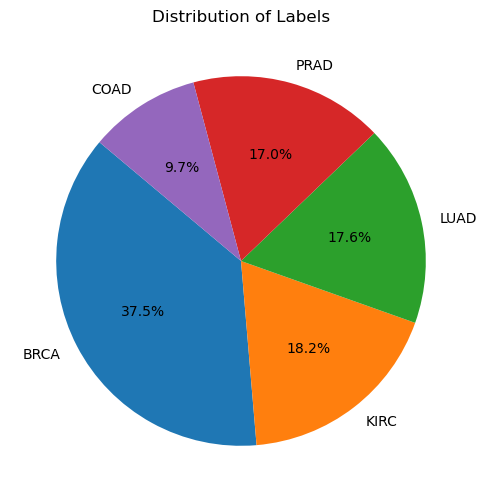

In [12]:
# Count the occurrences of each unique label
label_counts = labelset['Class'].value_counts() 

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Labels')
plt.show()



In [13]:
print(labelset.dtypes)

Unnamed: 0    object
Class         object
dtype: object


In [14]:
# Check for missing values in the data
missing_values_data = dataset.isnull().sum().sum()
missing_values_labels = labelset.isnull().sum().sum()

print(f"Missing values in data: {missing_values_data}")
print(f"Missing values in labels: {missing_values_labels}")


Missing values in data: 0
Missing values in labels: 0


In [10]:
# Descriptive statistics for the data
data_description = dataset.describe()

# Distribution of classes in the labels
class_distribution = labelset['Class'].value_counts()

print(data_description)
print(class_distribution)


           gene_0      gene_1      gene_2      gene_3      gene_4  gene_5  \
count  801.000000  801.000000  801.000000  801.000000  801.000000   801.0   
mean     0.026642    3.010909    3.095350    6.722305    9.813612     0.0   
std      0.136850    1.200828    1.065601    0.638819    0.506537     0.0   
min      0.000000    0.000000    0.000000    5.009284    8.435999     0.0   
25%      0.000000    2.299039    2.390365    6.303346    9.464466     0.0   
50%      0.000000    3.143687    3.127006    6.655893    9.791599     0.0   
75%      0.000000    3.883484    3.802534    7.038447   10.142324     0.0   
max      1.482332    6.237034    6.063484   10.129528   11.355621     0.0   

           gene_6      gene_7      gene_8      gene_9  ...  gene_20521  \
count  801.000000  801.000000  801.000000  801.000000  ...  801.000000   
mean     7.405509    0.499882    0.016744    0.013428  ...    5.896573   
std      1.108237    0.508799    0.133635    0.204722  ...    0.746399   
min      3

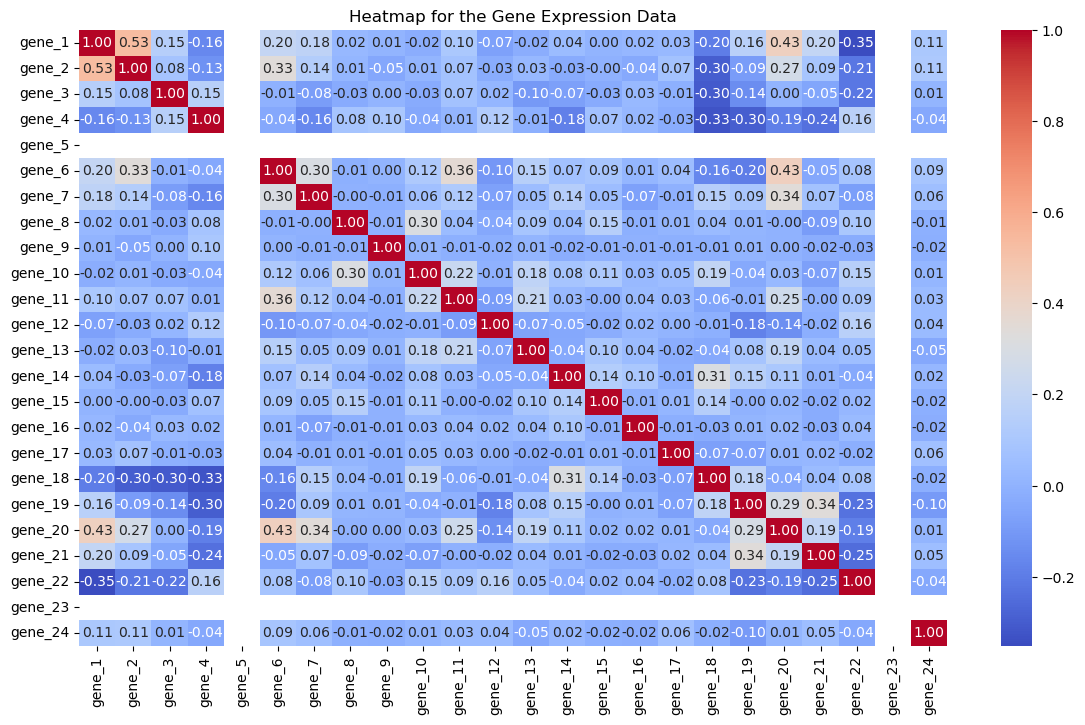

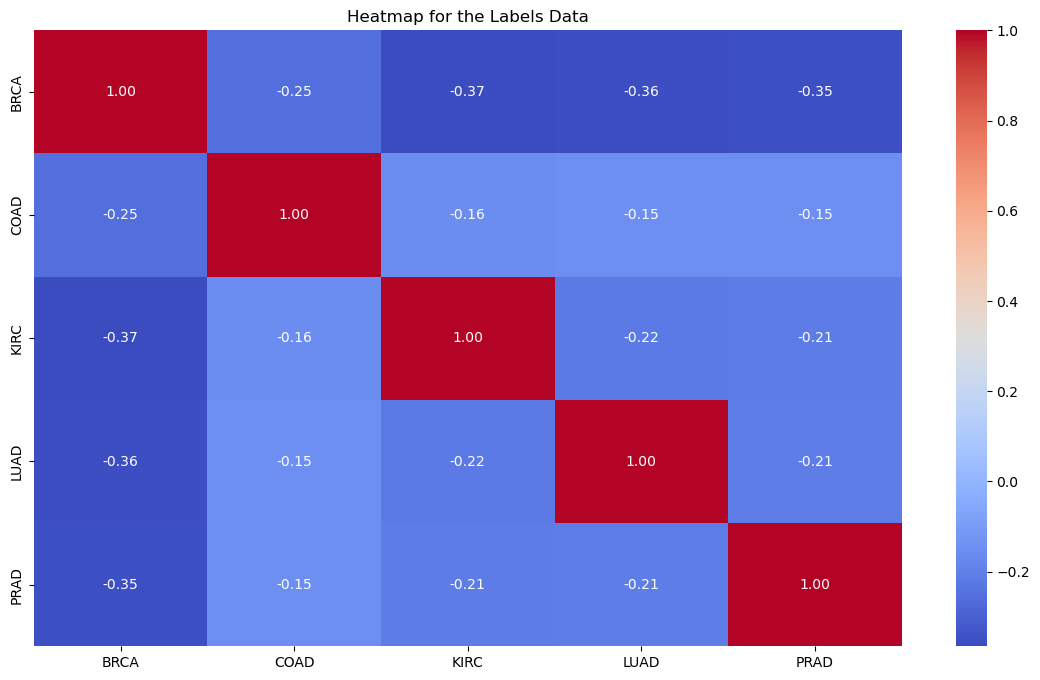

In [15]:
# Generate a heatmap for the gene expression data
# Due to memory constraints, we will sample a subset of genes
import seaborn as sns
heatmap_data = dataset.iloc[:, 1:25]  # Using the first 25 genes for the heatmap

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap for the Gene Expression Data')
plt.show()

# Generate a heatmap for the class distribution in the labels
# For this, we need to encode the labels numerically
labels_encoded = pd.get_dummies(labelset['Class'])
plt.figure(figsize=(14, 8))
sns.heatmap(labels_encoded.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap for the Labels Data')
plt.show()


In [16]:
# Assigning the modified dataset to the varaible 'x'.
X = dataset
X

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,0.0,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
797,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,0.0,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
798,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,0.0,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
799,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,0.0,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000


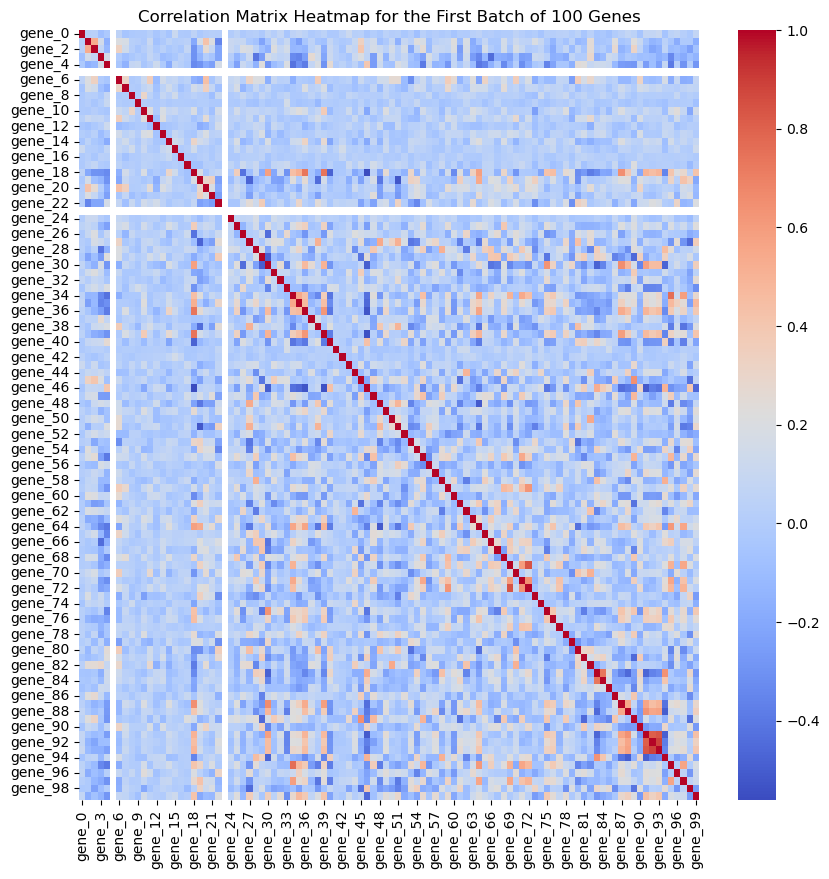

In [17]:
# Calculate the correlation matrix for batches of 500 genes
batch_size = 100
num_batches = dataset.shape[1] // batch_size + (1 if dataset.shape[1] % batch_size else 0)

# Initialize a list to store the correlation matrices for each batch
batch_correlation_matrices_no_def = []

# Compute the correlation matrix for each batch
for batch_num in range(num_batches):
    start_index = batch_num * batch_size
    end_index = min(start_index + batch_size, dataset.shape[1])
    batch_data = dataset.iloc[:, start_index:end_index]
    batch_correlation = batch_data.corr()
    batch_correlation_matrices_no_def.append(batch_correlation)

# Now, let's plot the heatmap for the correlation matrix of the first batch
plt.figure(figsize=(10,10))
sns.heatmap(batch_correlation_matrices_no_def[0], cmap='coolwarm')
plt.title('Correlation Matrix Heatmap for the First Batch of 100 Genes')
plt.show()


In [20]:
#Using StandardScaler for normalization
#StandardScaler is used to remove the outliners and scale the data by making the mean of the data 0 and standard deviation as 1.

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.19479935, -0.82802988,  0.15980044, ..., -1.18793812,
        -0.11648251, -0.26190144],
       [-0.19479935, -2.01501735, -1.415042  , ..., -0.34227662,
        -1.65688871, -0.26190144],
       [-0.19479935,  0.41734754,  1.15673547, ...,  0.88686027,
        -1.85526414, -0.26190144],
       ...,
       [-0.19479935,  0.19888076,  0.57481583, ..., -0.22008186,
        -0.41046699,  1.3485582 ],
       [-0.19479935, -0.35045311, -0.28863152, ...,  1.43719268,
         0.09195083, -0.26190144],
       [-0.19479935, -0.57135218,  0.66725377, ...,  0.45087581,
        -0.47161901, -0.26190144]])

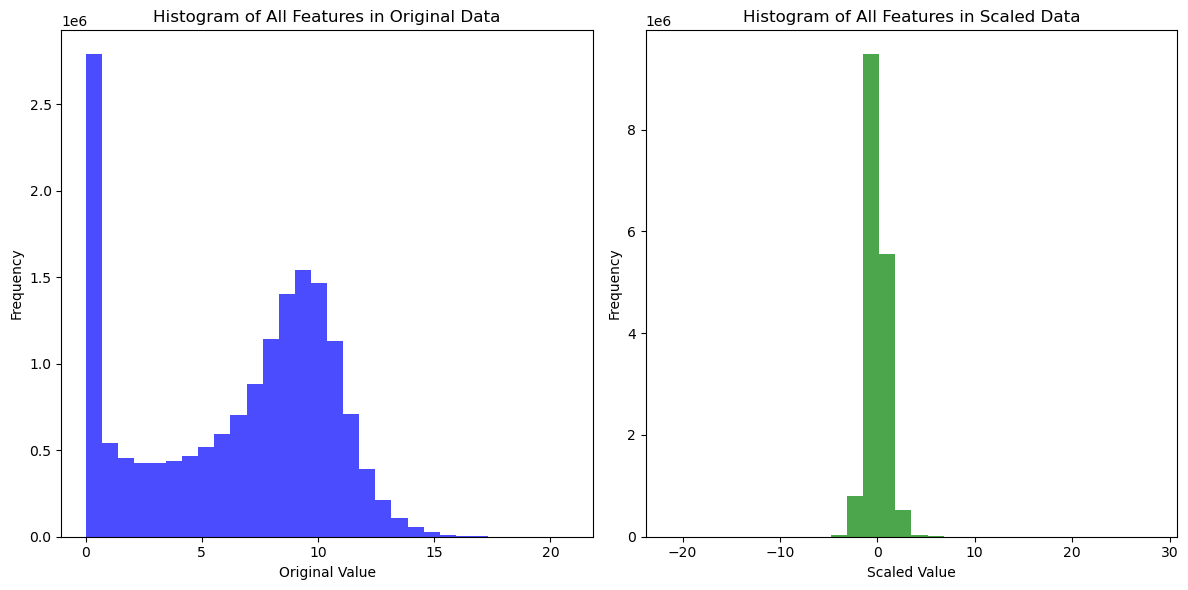

In [25]:
# Generating histograms to compare the original and scaled data

plt.figure(figsize=(12, 6))

# Combining both the original and scaled data into one histogram for comparison
# Flattening both datasets to 1D arrays
flattened_original_data = X.to_numpy().flatten()
flattened_scaled_data = X_scaled.flatten()

# Histogram for the original data
plt.subplot(1, 2, 1)
plt.hist(flattened_original_data, bins=30, color='blue', alpha=0.7)
plt.title('Histogram of All Features in Original Data')
plt.xlabel('Original Value')
plt.ylabel('Frequency')

# Histogram for the scaled data
plt.subplot(1, 2, 2)
plt.hist(flattened_scaled_data, bins=30, color='green', alpha=0.7)
plt.title('Histogram of All Features in Scaled Data')
plt.xlabel('Scaled Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [92]:
#Applying Principal Component Analysis
#Using PCA which will reduce the dimension of features by creating new features which have most of the varience of the original data. 
#Create a PCA object that will retain 95 percentage of the variance 

pca = PCA(n_components=0.95)

X_pca = pca.fit_transform(X_scaled)

#X_pca.shape

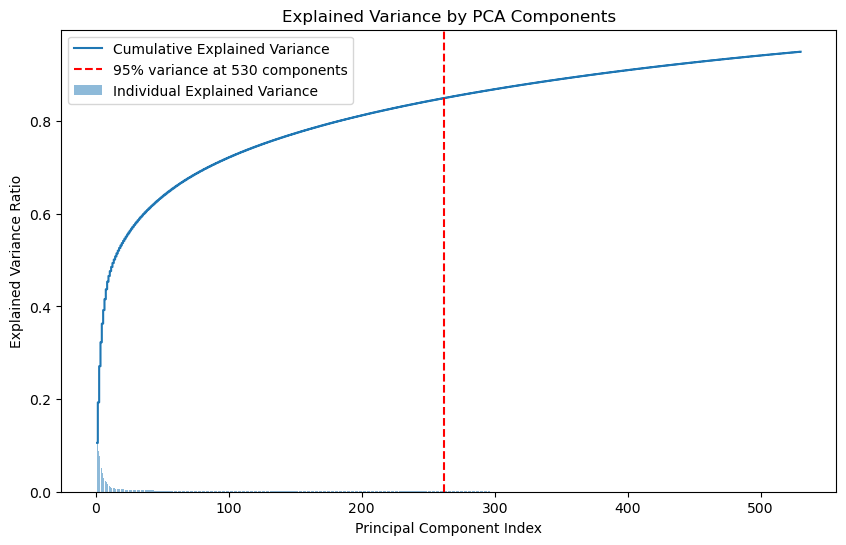

Number of components to retain 85% variance: 530


In [93]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming X_scaled is your scaled dataset
# Perform PCA
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Variance explained by each principal component
explained_variance = pca.explained_variance_ratio_

# Cumulative variance
cumulative_variance = explained_variance.cumsum()

# Number of components to reach 85% variance
num_components_95_var = (cumulative_variance < 0.95).sum() + 1

# Create a figure for the plot
plt.figure(figsize=(10, 6))

# Bar plot for explained variance
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Individual Explained Variance')
# Line plot for cumulative variance
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative Explained Variance')

# Highlighting the number of components that make up 95% of the variance
plt.axvline(x=num_components_85_var, color='r', linestyle='--', label=f'95% variance at {num_components_95_var} components')

plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component Index')
plt.title('Explained Variance by PCA Components')
plt.legend(loc='best')
plt.show()

# Print the reduced number of components
print(f"Number of components to retain 85% variance: {num_components_95_var}")


In [94]:
print("Original number of features:",X.shape[1])

print("Reduced number of features:",X_pca.shape[1])

Original number of features: 20531
Reduced number of features: 530


In [95]:
#Percentage of variance explained by each of the selected components.
pca.explained_variance_ratio_

array([0.10539781, 0.08754232, 0.07810081, 0.05165647, 0.04028932,
       0.02920881, 0.02354735, 0.02145299, 0.01632001, 0.01233899,
       0.01054096, 0.00894552, 0.00850433, 0.00752984, 0.00666611,
       0.0064694 , 0.00608615, 0.00585061, 0.00529366, 0.0051549 ,
       0.00489259, 0.00465834, 0.00454998, 0.00447636, 0.00424869,
       0.00418138, 0.00402427, 0.00393607, 0.00390401, 0.00358687,
       0.00357583, 0.00349978, 0.00337339, 0.00332523, 0.0032467 ,
       0.00320125, 0.00309221, 0.00295194, 0.00285026, 0.00280398,
       0.00277137, 0.00268945, 0.00266042, 0.00261041, 0.00258862,
       0.00255568, 0.0025224 , 0.0024917 , 0.00243814, 0.0023786 ,
       0.00233779, 0.00229684, 0.00226779, 0.00224909, 0.00217467,
       0.00214957, 0.00213074, 0.00210761, 0.00204805, 0.00204241,
       0.00199857, 0.00197631, 0.00197323, 0.00194865, 0.00192493,
       0.00184282, 0.00182154, 0.00179407, 0.00176827, 0.00176254,
       0.00172514, 0.00170721, 0.00169442, 0.00168177, 0.00164

In [96]:
#The estimated number of components
pca.n_components_

530

In [97]:
#Important features information or features extractions or Selected features.
X_pca

array([[-5.74469869e+01,  9.54109807e+01,  7.43015433e+01, ...,
         5.48184739e-01, -1.50120174e+00, -1.72333213e+00],
       [-1.69194301e+01,  7.32470333e-01, -6.40728996e+01, ...,
         8.55043472e-01,  4.95667115e+00,  6.80014457e-02],
       [-7.03452179e+01, -1.93033266e+01,  2.04882405e+01, ...,
         1.06332262e+00,  1.02386737e+00, -1.25341991e+00],
       ...,
       [-4.13308968e+00,  1.56900139e+01, -2.26444535e+01, ...,
        -1.29177710e-01, -3.42774144e-01,  4.51478684e-01],
       [-3.08147575e+01,  3.35264225e+01,  7.05656359e+01, ...,
         1.52723916e+00, -1.12062433e-01,  1.52790441e-01],
       [-2.23445567e+01,  4.05235632e+00,  3.23278757e+01, ...,
         2.19367065e+00,  3.86106929e+00,  7.99397375e-02]])

In [98]:
# Conduct the PCA with 2 components.
pca = PCA(2)
X_pca = pca.fit_transform(X_scaled)
X_pca.shape

(801, 2)

In [99]:
pca.explained_variance_ratio_

array([0.10539781, 0.08754232])

In [100]:
# Concating the target label data with 2 principal components
df=pd.read_csv("labels.csv")

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(X_scaled)

principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])

finalDf = pd.concat([principalDf, df[['Class']]], axis = 1)

finalDf


,PC1,PC2,Class
0,-57.446987,95.410981,PRAD
1,-16.919430,0.732470,LUAD
2,-70.345218,-19.303327,PRAD
3,-49.161591,-9.227586,PRAD
4,-18.132534,-51.327797,BRCA
...,...,...,...
796,-12.417385,-42.321573,BRCA
797,-29.415554,28.526281,LUAD
798,-4.133090,15.690014,COAD
799,-30.814757,33.526423,PRAD


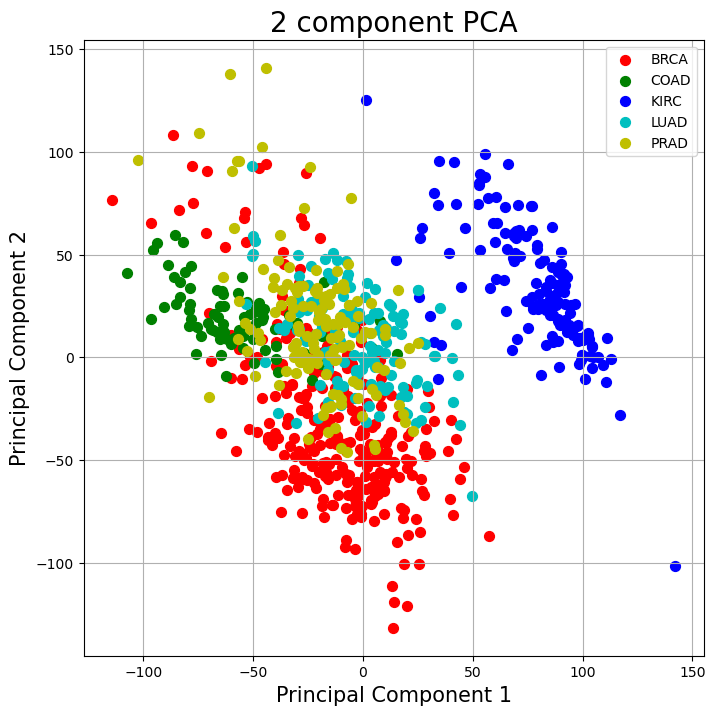

In [101]:
# Visualizing the scatter plot with the 2 PCA and target labels.

fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(1,1,1) 

ax.set_xlabel('Principal Component 1', fontsize = 15)

ax.set_ylabel('Principal Component 2', fontsize = 15)

ax.set_title('2 component PCA', fontsize = 20)

targets = ['BRCA', 'COAD', 'KIRC','LUAD','PRAD']

colors = ['r', 'g', 'b','c','y']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1'], finalDf.loc[indicesToKeep, 'PC2'], c=color, s = 50)
    
ax.legend(targets)
ax.grid()

In [102]:

#PCA for 3 components

pca = PCA(n_components=3)

principalComponents = pca.fit_transform(X_scaled)
explained_variance = pca.explained_variance_ratio_

principalDf2 = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2','PC3'])

finalDf2 = pd.concat([principalDf2, df[['Class']]], axis = 1)

finalDf2

# Expected Output:
print("Explained variance by the first 3 principal components:", explained_variance)




Explained variance by the first 3 principal components: [0.10539781 0.08754232 0.07810081]


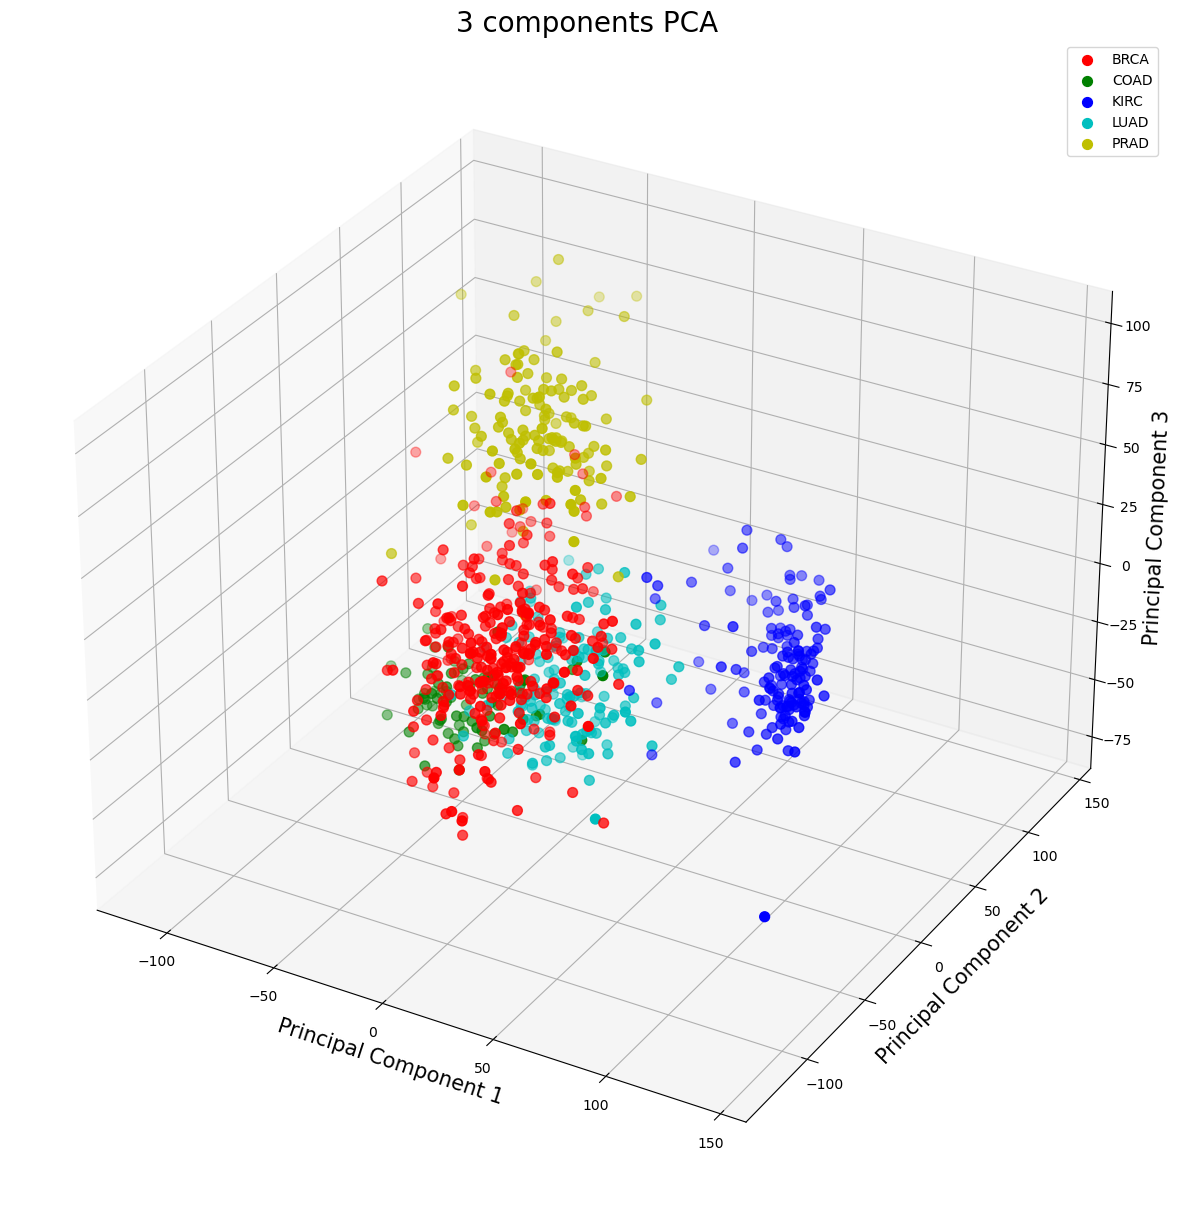

In [103]:

# 3D Visualization
fig = plt.figure(figsize=(15, 15))

ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Principal Component 1', fontsize = 15)

ax.set_ylabel('Principal Component 2', fontsize = 15)

ax.set_zlabel('Principal Component 3', fontsize = 15)

ax.set_title('3 components PCA', fontsize = 20)

targets = ['BRCA', 'COAD', 'KIRC','LUAD','PRAD']

colors = ['r', 'g', 'b','c','y']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf2['Class'] == target
    ax.scatter(finalDf2.loc[indicesToKeep, 'PC1'], finalDf2.loc[indicesToKeep, 'PC2'], finalDf2.loc[indicesToKeep, 'PC3'], c=color, s = 50)
    
ax.legend(targets)
ax.grid()


In [104]:
from sklearn.cluster import KMeans

In [105]:
kmeans = KMeans(n_clusters=5, init="k-means++", n_init=50, max_iter=500, random_state=42)
# Fit the KMeans algorithm to the PCA-transformed data
kmeans.fit(X_pca)
clusters = kmeans.labels_

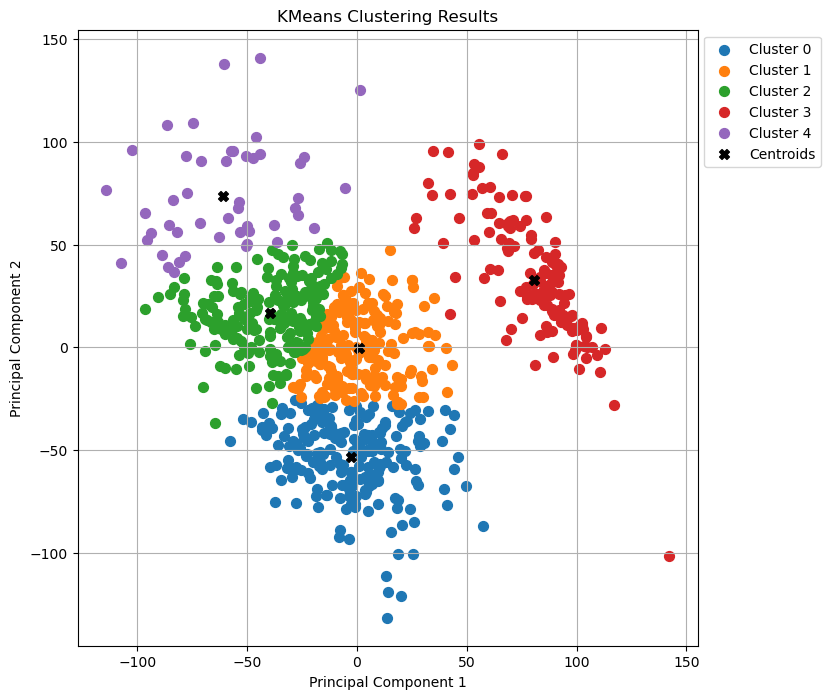

In [106]:
plt.figure(figsize=(8, 8))

# Unique clusters
unique_clusters = np.unique(clusters)

# Loop through all unique clusters
for cluster in unique_clusters:
    # Mask to separate sets of data
    mask = clusters == cluster
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], s=50, label=f"Cluster {cluster}", cmap='plasma')

# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=50, label="Centroids")

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering Results')
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.grid()
plt.show()


For n_clusters = 2, the average silhouette_score is : 0.49215654590788993
For n_clusters = 3, the average silhouette_score is : 0.4601246599200232
For n_clusters = 4, the average silhouette_score is : 0.40872053753383003
For n_clusters = 5, the average silhouette_score is : 0.38999278706459745
For n_clusters = 6, the average silhouette_score is : 0.38710935654047884


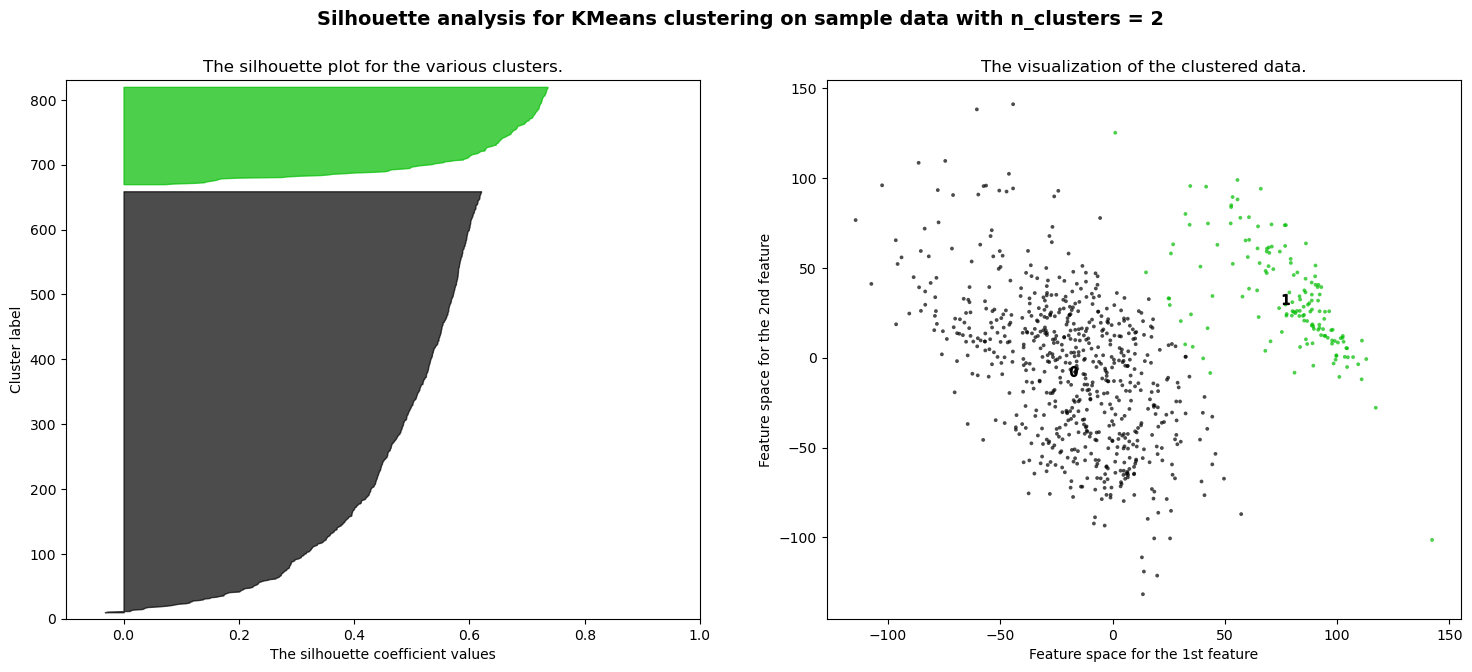

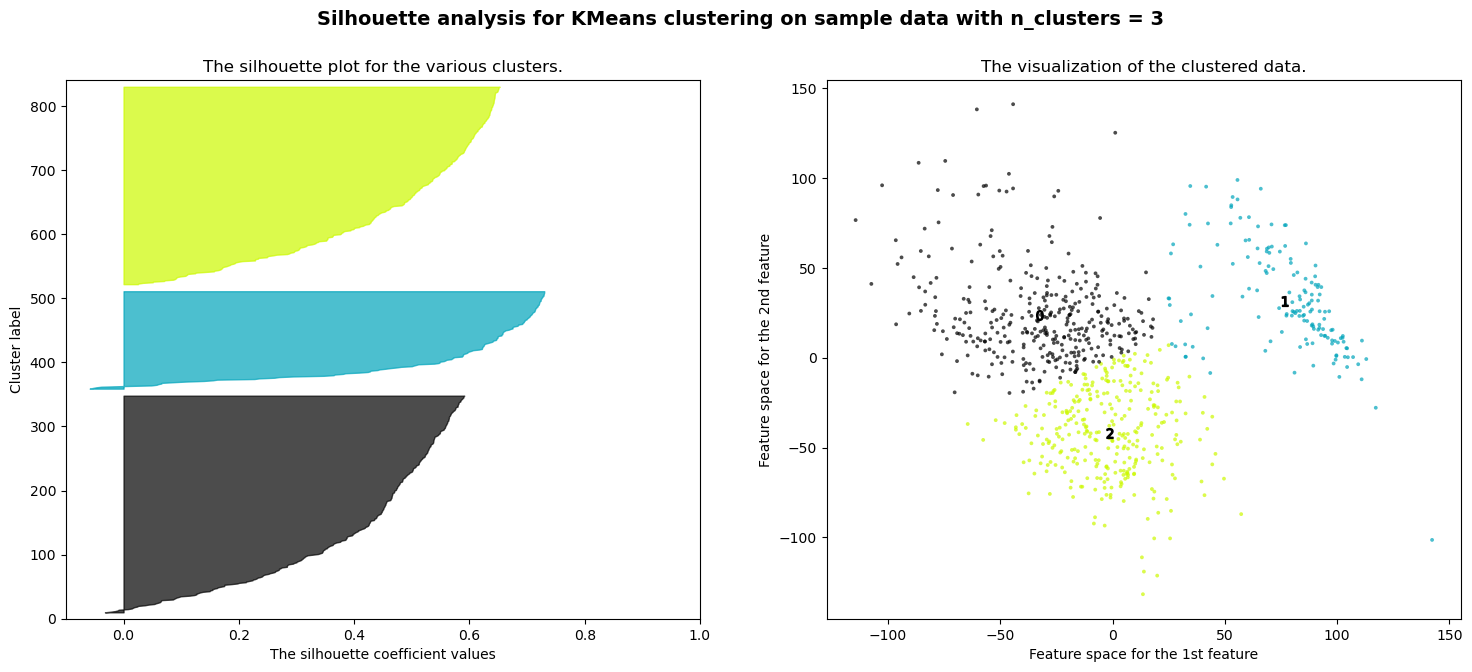

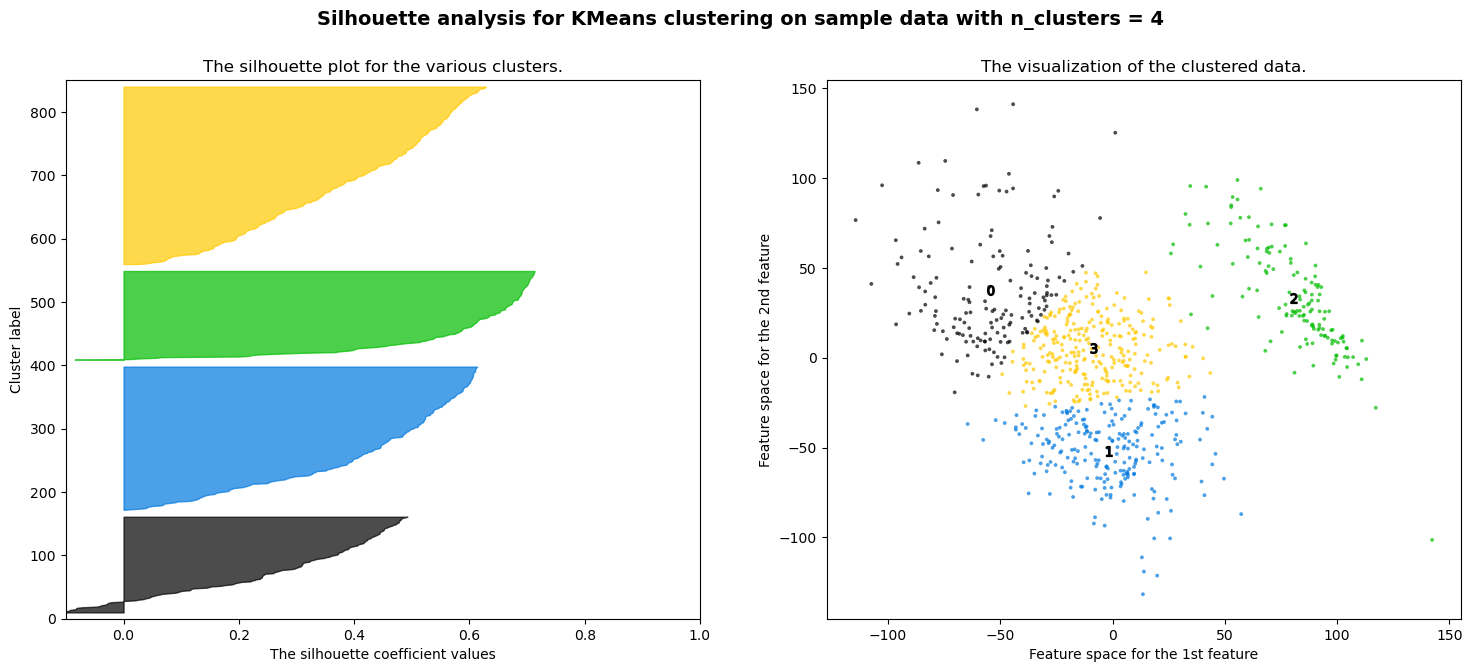

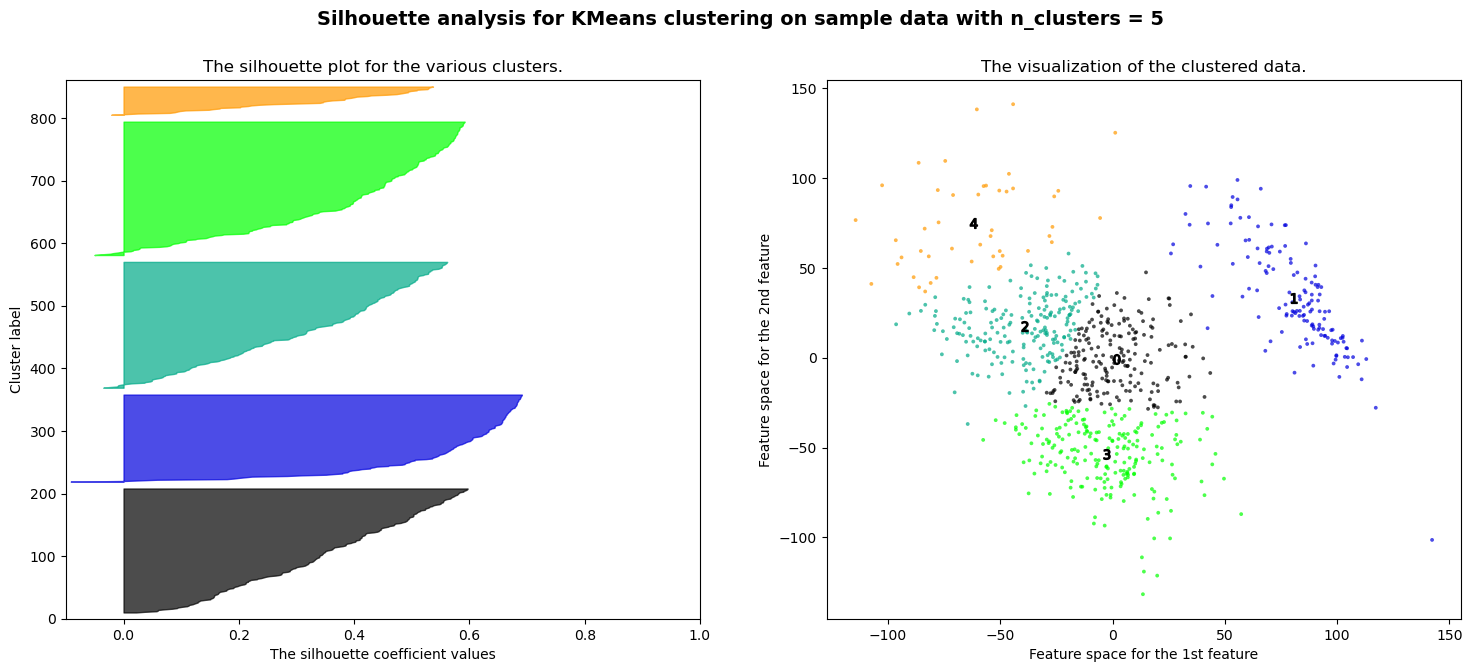

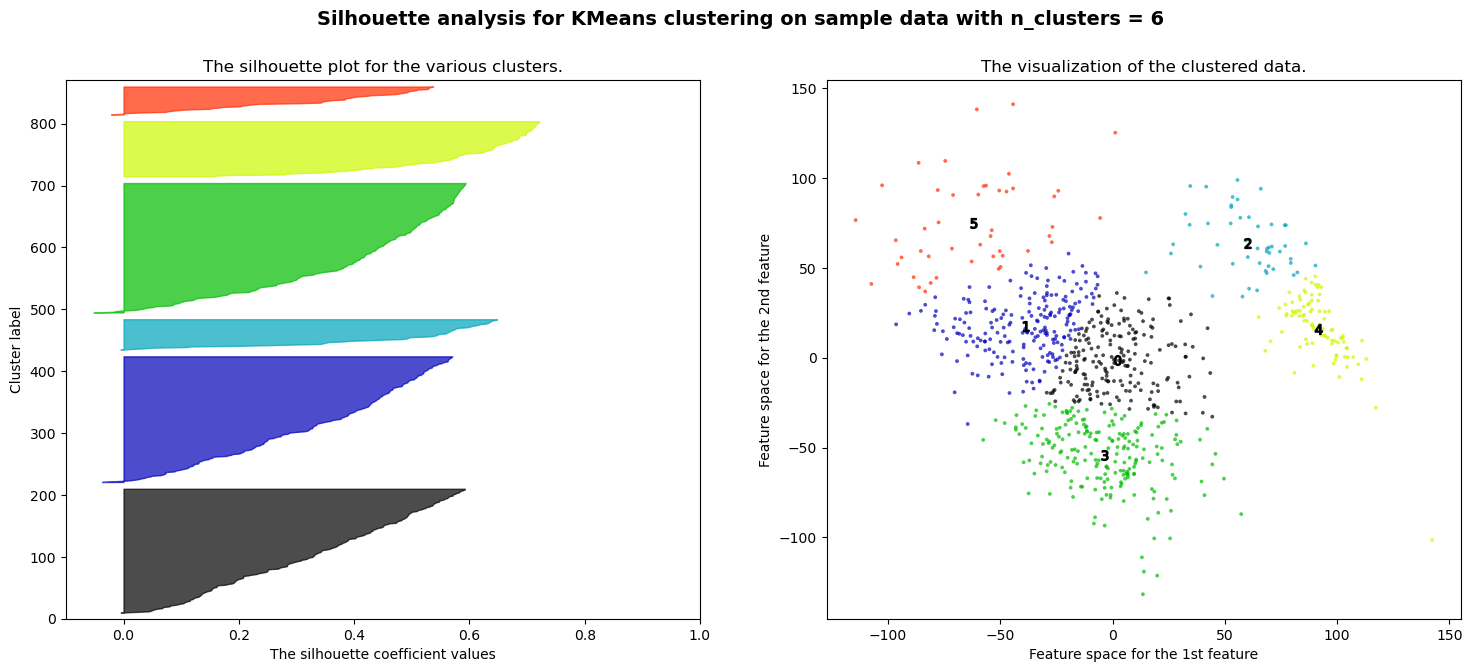

In [107]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6]  # Example range

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X_pca) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator seed for reproducibility
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_pca)

    # The silhouette_score gives the average value for all the samples
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The 2nd subplot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_pca[:, 0], X_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle((f"Silhouette analysis for KMeans clustering on sample data with n_clusters = {n_clusters}"),
                 fontsize=14, fontweight='bold')

plt.show()


In [73]:
Y=df['Class']

In [111]:
from sklearn.model_selection import train_test_split
#The data set into training and validation sets. 80:20
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


In [112]:
pca = PCA(n_components=0.95)

X_train_pca = pca.fit_transform(X_train)

X_test_pca = pca.transform(X_test)

In [113]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score,confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report

rfc_clf = RandomForestClassifier()

rfc_clf.fit(X_train_pca, y_train)

y_pred = rfc_clf.predict(X_test_pca)

target_names =['BRCA', 'COAD', 'KIRC','LUAD','PRAD']

rf_accuracy = accuracy_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred, average="macro")
rf_recall = recall_score(y_test, y_pred, average="macro")
rf_fscore = f1_score(y_test, y_pred, average="macro")

print(f"Random Forest Metrics:")
print(f"Accuracy: {rf_accuracy*100:.2f}%")
print(f"Precision (macro avg): {rf_precision*100:.2f}%")
print(f"Recall (macro avg): {rf_recall*100:.2f}%")
print(f"F1-score (macro avg): {rf_fscore*100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))


Random Forest Metrics:
Accuracy: 98.76%
Precision (macro avg): 99.35%
Recall (macro avg): 98.10%
F1-score (macro avg): 98.69%

Classification Report:
              precision    recall  f1-score   support

        BRCA       0.97      1.00      0.98        90
        COAD       1.00      0.93      0.96        28
        KIRC       1.00      1.00      1.00        41
        LUAD       1.00      1.00      1.00        40
        PRAD       1.00      0.98      0.99        42

    accuracy                           0.99       241
   macro avg       0.99      0.98      0.99       241
weighted avg       0.99      0.99      0.99       241



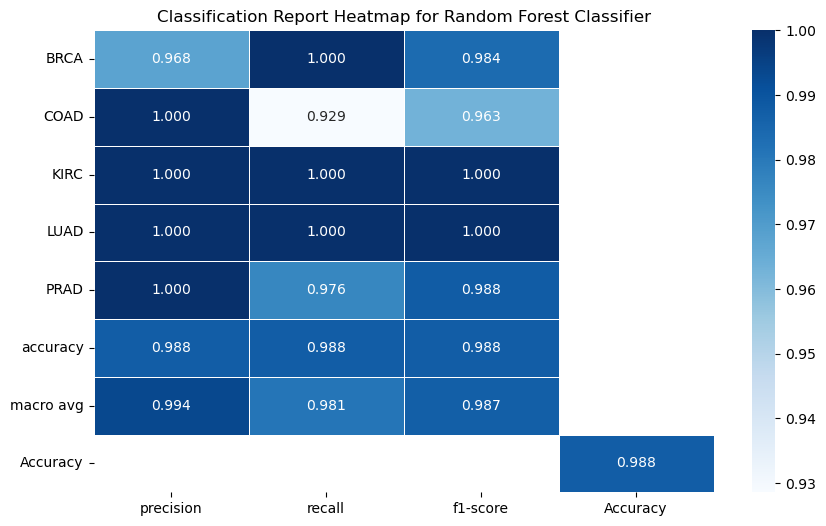

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import pandas as pd

# Assuming y_test and y_pred are defined and contain the true and predicted labels
report = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Prepare the DataFrame for heatmap
# Exclude the 'support' column and the last row (which contains average/total metrics)
heatmap_data = report_df.drop(columns="support").iloc[:-1, :]

# Extract accuracy and convert it into a DataFrame
accuracy_data = pd.DataFrame({'Accuracy': report['accuracy']}, index=["Accuracy"])

# Combine heatmap data and accuracy data
combined_data = pd.concat([heatmap_data, accuracy_data])

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(combined_data, annot=True, cmap="Blues", fmt=".3f", linewidths=.5)
plt.title("Classification Report Heatmap for Random Forest Classifier")
plt.yticks(rotation=0)  # Keep the class names horizontal
plt.show()


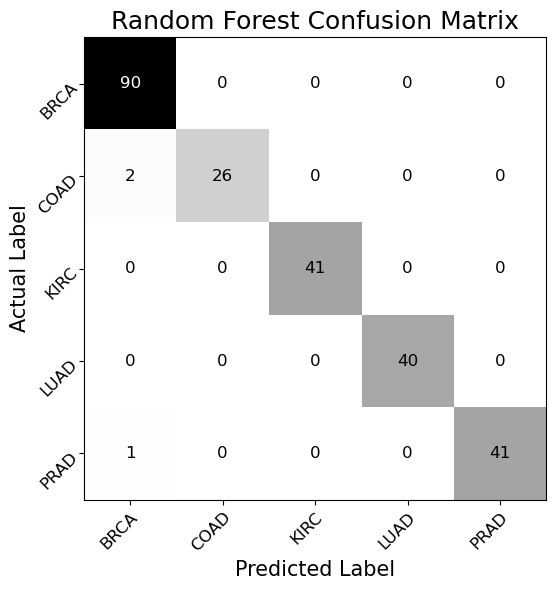

In [115]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(6, 6))

# Display the confusion matrix using imshow
ax.imshow(conf_matrix,  cmap=plt.cm.Greys)

# Add title and labels
ax.set_title('Random Forest Confusion Matrix', fontsize=18)
tick_marks = np.arange(len(target_names))
ax.set_xticks(tick_marks)
ax.set_yticks(tick_marks)
ax.set_xticklabels(target_names, fontsize=12)
ax.set_yticklabels(target_names, fontsize=12)
plt.xlabel('Predicted Label', fontsize=15)
plt.ylabel('Actual Label', fontsize=15)

# Rotate the tick labels for better visibility
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.setp(ax.get_yticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations to display the actual numbers
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(j, i, format(conf_matrix[i, j], 'd'), ha="center", va="center",
                color="white" if conf_matrix[i, j] > thresh else "black", fontsize=12)

plt.tight_layout()
plt.show()


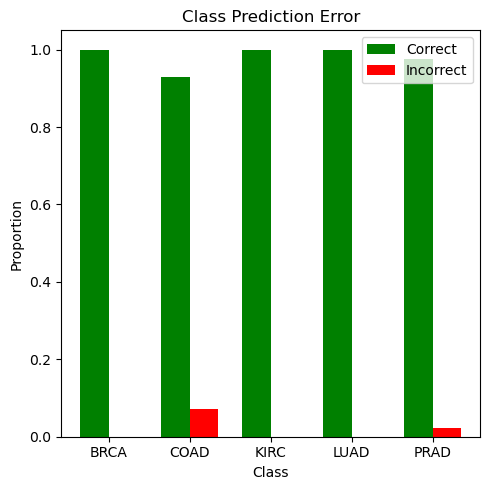

In [116]:
# Plotting Class Prediction Error based on the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming y_test are your true labels and y_pred are the predictions from Random Forest model
y_pred = rfc_clf.predict(X_test_pca)  # Replace with your model and test data if needed

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
classes = np.unique(y_test)

# Calculate the percentage of total for each class
class_totals = conf_matrix.sum(axis=1)
class_correct = np.diag(conf_matrix)
class_error = class_totals - class_correct

# Plot
fig, ax = plt.subplots(figsize=(5, 5))
indices = np.arange(len(classes))
bar_width = 0.35

ax.bar(indices, class_correct / class_totals, bar_width, label='Correct', color='Green')
ax.bar(indices + bar_width, class_error / class_totals, bar_width, label='Incorrect', color='red')

# Labeling
ax.set_xlabel('Class')
ax.set_ylabel('Proportion')
ax.set_title('Class Prediction Error')
ax.set_xticks(indices + bar_width / 2)
ax.set_xticklabels(classes)
ax.legend()

plt.tight_layout()
plt.show()


In [117]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score,confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report

svm_clf = SVC()

svm_clf.fit(X_train_pca, y_train)

y_pred = svm_clf.predict(X_test_pca)

target_names =['BRCA', 'COAD', 'KIRC','LUAD','PRAD']

svm_accuracy = accuracy_score(y_test, y_pred)
svm_precision = precision_score(y_test, y_pred, average="macro")
svm_recall = recall_score(y_test, y_pred, average="macro")
svm_fscore = f1_score(y_test, y_pred, average="macro")

print(f"Support Vector Machines Metrics:")
print(f"Accuracy: {svm_accuracy*100:.2f}%")
print(f"Precision (macro avg): {svm_precision*100:.2f}%")
print(f"Recall (macro avg): {svm_recall*100:.2f}%")
print(f"F1-score (macro avg): {svm_fscore*100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

Support Vector Machines Metrics:
Accuracy: 100.00%
Precision (macro avg): 100.00%
Recall (macro avg): 100.00%
F1-score (macro avg): 100.00%

Classification Report:
              precision    recall  f1-score   support

        BRCA       1.00      1.00      1.00        90
        COAD       1.00      1.00      1.00        28
        KIRC       1.00      1.00      1.00        41
        LUAD       1.00      1.00      1.00        40
        PRAD       1.00      1.00      1.00        42

    accuracy                           1.00       241
   macro avg       1.00      1.00      1.00       241
weighted avg       1.00      1.00      1.00       241



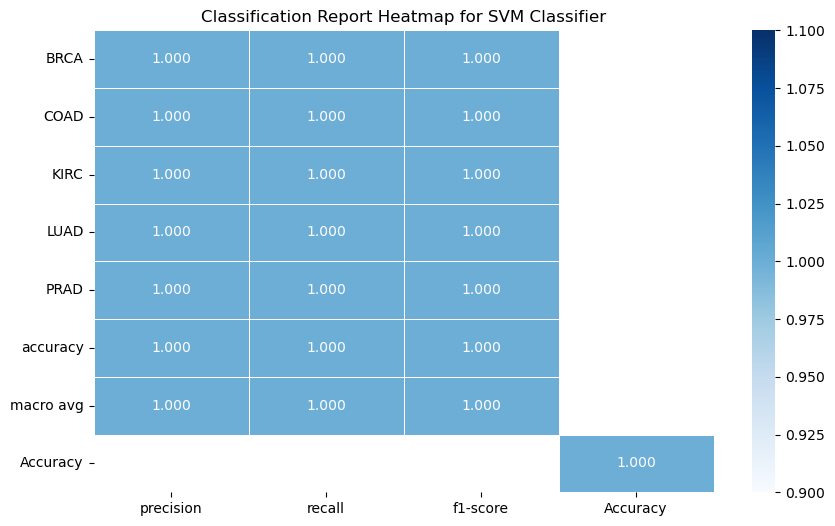

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import pandas as pd

# Assuming y_test and y_pred are defined and contain the true and predicted labels
report = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Prepare the DataFrame for heatmap
# Exclude the 'support' column and the last row (which contains average/total metrics)
heatmap_data = report_df.drop(columns="support").iloc[:-1, :]

# Extract accuracy and convert it into a DataFrame
accuracy_data = pd.DataFrame({'Accuracy': report['accuracy']}, index=["Accuracy"])

# Combine heatmap data and accuracy data
combined_data = pd.concat([heatmap_data, accuracy_data])

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(combined_data, annot=True, cmap="Blues", fmt=".3f", linewidths=.5)
plt.title("Classification Report Heatmap for SVM Classifier")
plt.yticks(rotation=0)  # Keep the class names horizontal
plt.show()


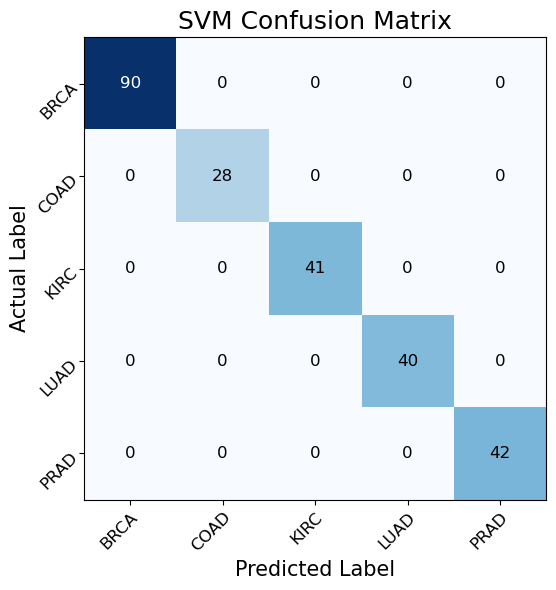

In [119]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(6, 6))

ax.imshow(cm,  cmap=plt.cm.Blues)

# Plot the confusion matrix
ax.set_title('SVM Confusion Matrix', fontsize=18)
tick_marks = np.arange(len(target_names))
ax.set_xticks(tick_marks)
ax.set_yticks(tick_marks)
ax.set_xticklabels(target_names, fontsize=12)
ax.set_yticklabels(target_names, fontsize=12)
plt.xlabel('Predicted Label', fontsize=15)
plt.ylabel('Actual Label', fontsize=15)


# Rotate the tick labels for better visibility
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.setp(ax.get_yticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations to display the actual numbers
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'), ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black", fontsize=12)

plt.tight_layout()
plt.show()

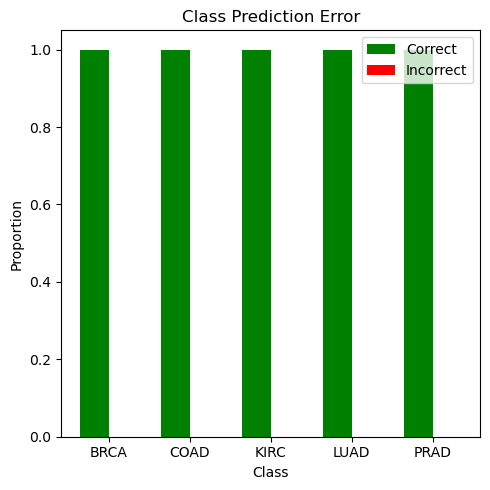

In [120]:
# Plotting Class Prediction Error based on the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming y_test are true labels and y_pred are the predictions from SVM
y_pred = svm_clf.predict(X_test_pca) 

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
classes = np.unique(y_test)

# Calculate the percentage of total for each class
class_totals = conf_matrix.sum(axis=1)
class_correct = np.diag(conf_matrix)
class_error = class_totals - class_correct

# Plot
fig, ax = plt.subplots(figsize=(5, 5))
indices = np.arange(len(classes))
bar_width = 0.35

ax.bar(indices, class_correct / class_totals, bar_width, label='Correct', color='Green')
ax.bar(indices + bar_width, class_error / class_totals, bar_width, label='Incorrect', color='red')

# Labeling
ax.set_xlabel('Class')
ax.set_ylabel('Proportion')
ax.set_title('Class Prediction Error')
ax.set_xticks(indices + bar_width / 2)
ax.set_xticklabels(classes)
ax.legend()

plt.tight_layout()
plt.show()

In [121]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report

# Initialize the Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier()

# Fit the model
gb_clf.fit(X_train_pca, y_train)

# Make predictions
y_pred = gb_clf.predict(X_test_pca)

# Define the target names
target_names = ['BRCA', 'COAD', 'KIRC', 'LUAD', 'PRAD']

# Calculate metrics
gb_accuracy = accuracy_score(y_test, y_pred)
gb_precision = precision_score(y_test, y_pred, average="macro")
gb_recall = recall_score(y_test, y_pred, average="macro")
gb_fscore = f1_score(y_test, y_pred, average="macro")

# Print metrics
print(f"Gradient Boosted Decision Tree Metrics:")
print(f"Accuracy: {gb_accuracy*100:.2f}%")
print(f"Precision (macro avg): {gb_precision*100:.2f}%")
print(f"Recall (macro avg): {gb_recall*100:.2f}%")
print(f"F1-score (macro avg): {gb_fscore*100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))




Gradient Boosted Decision Tree Metrics:
Accuracy: 99.17%
Precision (macro avg): 99.05%
Recall (macro avg): 98.81%
F1-score (macro avg): 98.91%

Classification Report:
              precision    recall  f1-score   support

        BRCA       1.00      1.00      1.00        90
        COAD       1.00      0.96      0.98        28
        KIRC       1.00      1.00      1.00        41
        LUAD       0.95      1.00      0.98        40
        PRAD       1.00      0.98      0.99        42

    accuracy                           0.99       241
   macro avg       0.99      0.99      0.99       241
weighted avg       0.99      0.99      0.99       241



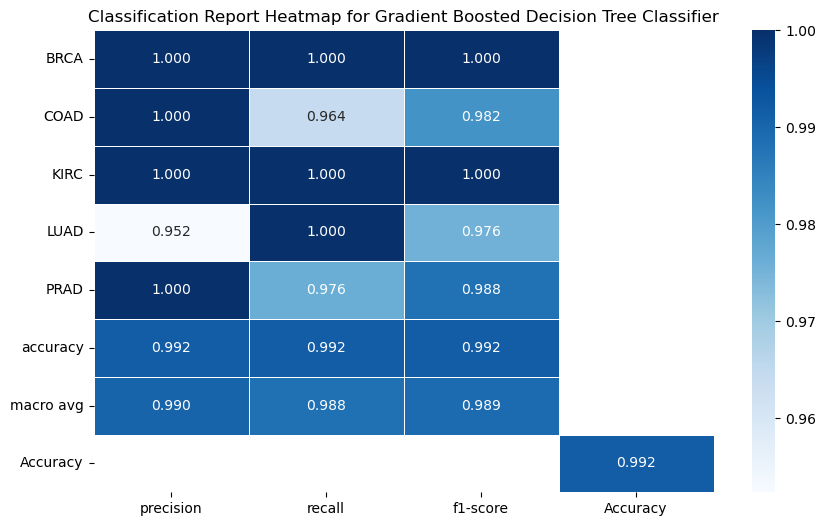

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import pandas as pd

# Assuming y_test and y_pred are defined and contain the true and predicted labels
report = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Prepare the DataFrame for heatmap
# Exclude the 'support' column and the last row (which contains average/total metrics)
heatmap_data = report_df.drop(columns="support").iloc[:-1, :]

# Extract accuracy and convert it into a DataFrame
accuracy_data = pd.DataFrame({'Accuracy': report['accuracy']}, index=["Accuracy"])

# Combine heatmap data and accuracy data
combined_data = pd.concat([heatmap_data, accuracy_data])

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(combined_data, annot=True, cmap="Blues", fmt=".3f", linewidths=.5)
plt.title("Classification Report Heatmap for Gradient Boosted Decision Tree Classifier")
plt.yticks(rotation=0)  # Keep the class names horizontal
plt.show()


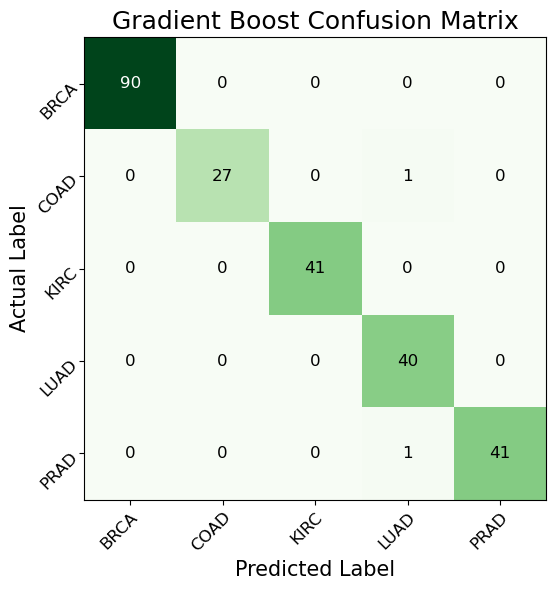

In [123]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cgb = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(6, 6))

ax.imshow(cgb,  cmap=plt.cm.Greens)

# Plot the confusion matrix
ax.set_title('Gradient Boost Confusion Matrix', fontsize=18)
tick_marks = np.arange(len(target_names))
ax.set_xticks(tick_marks)
ax.set_yticks(tick_marks)
ax.set_xticklabels(target_names, fontsize=12)
ax.set_yticklabels(target_names, fontsize=12)
plt.xlabel('Predicted Label', fontsize=15)
plt.ylabel('Actual Label', fontsize=15)


# Rotate the tick labels for better visibility
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.setp(ax.get_yticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations to display the actual numbers
thresh = cgb.max() / 2.
for i in range(cgb.shape[0]):
    for j in range(cgb.shape[1]):
        ax.text(j, i, format(cgb[i, j], 'd'), ha="center", va="center",
                color="white" if cgb[i, j] > thresh else "black", fontsize=12)

plt.tight_layout()
plt.show()

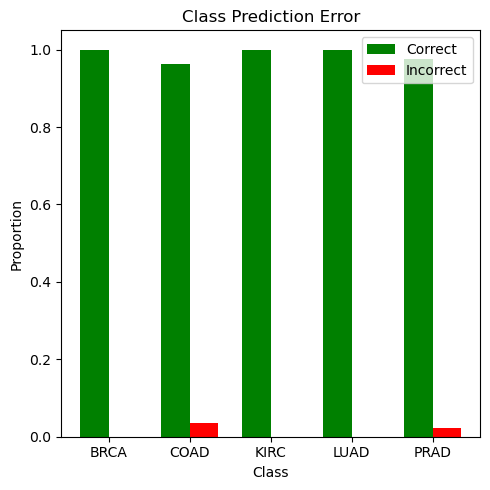

In [124]:
# Plotting Class Prediction Error based on the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming y_test are true labels and y_pred are the predictions from Gradient Boost 
y_pred = gb_clf.predict(X_test_pca)  

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
classes = np.unique(y_test)

# Calculate the percentage of total for each class
class_totals = conf_matrix.sum(axis=1)
class_correct = np.diag(conf_matrix)
class_error = class_totals - class_correct

# Plot
fig, ax = plt.subplots(figsize=(5,5))
indices = np.arange(len(classes))
bar_width = 0.35

ax.bar(indices, class_correct / class_totals, bar_width, label='Correct', color='Green')
ax.bar(indices + bar_width, class_error / class_totals, bar_width, label='Incorrect', color='red')

# Labeling
ax.set_xlabel('Class')
ax.set_ylabel('Proportion')
ax.set_title('Class Prediction Error')
ax.set_xticks(indices + bar_width / 2)
ax.set_xticklabels(classes)
ax.legend()

plt.tight_layout()
plt.show()

In [125]:
#Neural Networks

In [127]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, confusion_matrix, classification_report
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

# Initialize the Neural Network classifier
# Here I am using one hidden layer with 100 neurons
nn_clf = MLPClassifier(hidden_layer_sizes=(150,), max_iter=200, activation='relu', solver='adam', random_state=1)

# Train the model
nn_clf.fit(X_train_pca, y_train)

# Predict on the test set
y_pred = nn_clf.predict(X_test_pca)

target_names = ['BRCA', 'COAD', 'KIRC', 'LUAD', 'PRAD']

# Compute the metrics
nn_accuracy = accuracy_score(y_test, y_pred)
nn_precision = precision_score(y_test, y_pred, average="macro")
nn_recall = recall_score(y_test, y_pred, average="macro")
nn_fscore = f1_score(y_test, y_pred, average="macro")

# Print the metrics
print(f"Neural Network Metrics:")
print(f"Accuracy: {nn_accuracy*100:.2f}%")
print(f"Precision (macro avg): {nn_precision*100:.2f}%")
print(f"Recall (macro avg): {nn_recall*100:.2f}%")
print(f"F1-score (macro avg): {nn_fscore*100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))


Neural Network Metrics:
Accuracy: 99.17%
Precision (macro avg): 99.05%
Recall (macro avg): 99.56%
F1-score (macro avg): 99.29%

Classification Report:
              precision    recall  f1-score   support

        BRCA       1.00      0.98      0.99        90
        COAD       1.00      1.00      1.00        28
        KIRC       1.00      1.00      1.00        41
        LUAD       0.98      1.00      0.99        40
        PRAD       0.98      1.00      0.99        42

    accuracy                           0.99       241
   macro avg       0.99      1.00      0.99       241
weighted avg       0.99      0.99      0.99       241



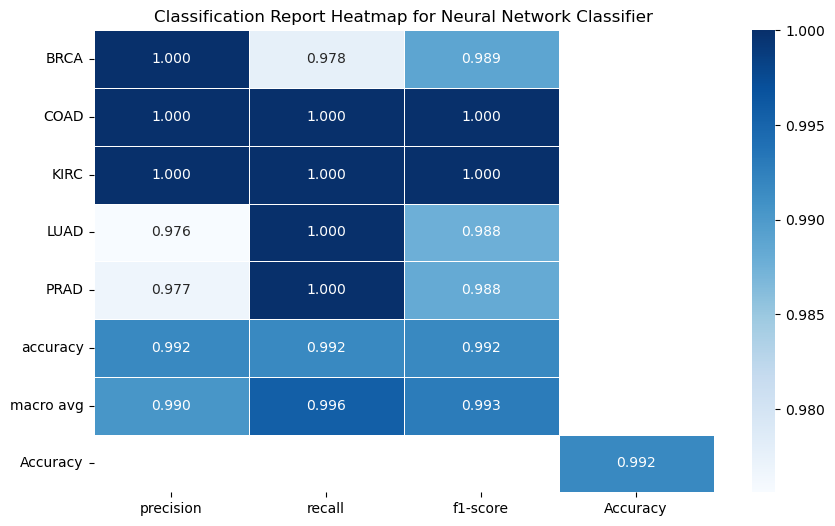

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import pandas as pd

# Assuming y_test and y_pred are defined and contain the true and predicted labels
report = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Prepare the DataFrame for heatmap
# Exclude the 'support' column and the last row (which contains average/total metrics)
heatmap_data = report_df.drop(columns="support").iloc[:-1, :]

# Extract accuracy and convert it into a DataFrame
accuracy_data = pd.DataFrame({'Accuracy': report['accuracy']}, index=["Accuracy"])

# Combine heatmap data and accuracy data
combined_data = pd.concat([heatmap_data, accuracy_data])

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(combined_data, annot=True, cmap="Blues", fmt=".3f", linewidths=.5)
plt.title("Classification Report Heatmap for Neural Network Classifier")
plt.yticks(rotation=0)  # Keep the class names horizontal
plt.show()


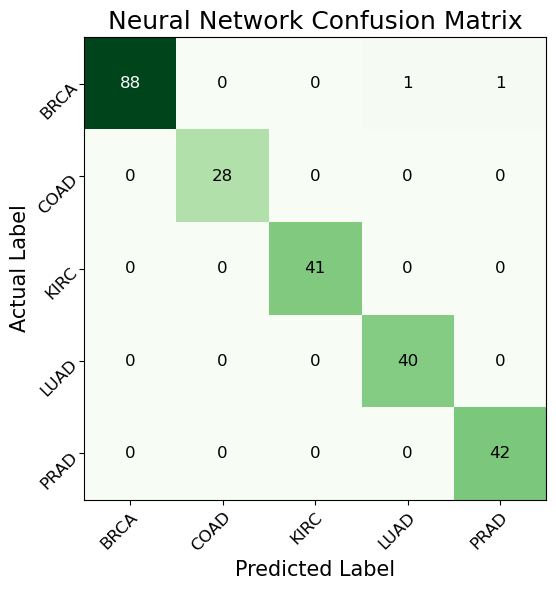

In [129]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cnn = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(6, 6))

ax.imshow(cnn,  cmap=plt.cm.Greens)

# Plot the confusion matrix
ax.set_title('Neural Network Confusion Matrix', fontsize=18)
tick_marks = np.arange(len(target_names))
ax.set_xticks(tick_marks)
ax.set_yticks(tick_marks)
ax.set_xticklabels(target_names, fontsize=12)
ax.set_yticklabels(target_names, fontsize=12)
plt.xlabel('Predicted Label', fontsize=15)
plt.ylabel('Actual Label', fontsize=15)


# Rotate the tick labels for better visibility
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.setp(ax.get_yticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations to display the actual numbers
thresh = cnn.max() / 2.
for i in range(cnn.shape[0]):
    for j in range(cnn.shape[1]):
        ax.text(j, i, format(cnn[i, j], 'd'), ha="center", va="center",
                color="white" if cnn[i, j] > thresh else "black", fontsize=12)

plt.tight_layout()
plt.show()

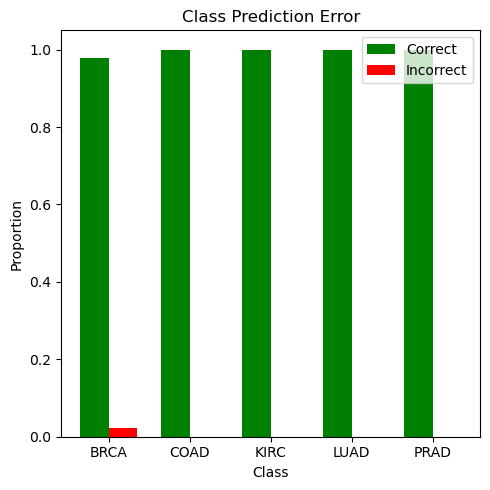

In [130]:
# Plotting Class Prediction Error based on the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming y_test are true labels and y_pred are the predictions from Neural Networks
y_pred = nn_clf.predict(X_test_pca)  

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
classes = np.unique(y_test)

# Calculate the percentage of total for each class
class_totals = conf_matrix.sum(axis=1)
class_correct = np.diag(conf_matrix)
class_error = class_totals - class_correct

# Plot
fig, ax = plt.subplots(figsize=(5, 5))
indices = np.arange(len(classes))
bar_width = 0.35

ax.bar(indices, class_correct / class_totals, bar_width, label='Correct', color='Green')
ax.bar(indices + bar_width, class_error / class_totals, bar_width, label='Incorrect', color='red')

# Labeling
ax.set_xlabel('Class')
ax.set_ylabel('Proportion')
ax.set_title('Class Prediction Error')
ax.set_xticks(indices + bar_width / 2)
ax.set_xticklabels(classes)
ax.legend()

plt.tight_layout()
plt.show()

In [136]:
# xgboost

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Transform labels to numerical format
label_encoder = LabelEncoder()

y_encoded = label_encoder.fit_transform(Y)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.4, random_state=42)

X_train_pca = pca.fit_transform(X_train)

X_test_pca = pca.transform(X_test)

# Initialize XGBoost classifier
xgb_clf = xgb.XGBClassifier(objective='multi:softprob', num_class=len(set(y_encoded)), seed=42)

# Fit the classifier to the training data
xgb_clf.fit(X_train_pca, y_train)

# Predict on the test data
y_pred = xgb_clf.predict(X_test_pca)

# Compute the metrics
xgb_accuracy = accuracy_score(y_test, y_pred)
xgb_precision = precision_score(y_test, y_pred, average="macro")
xgb_recall = recall_score(y_test, y_pred, average="macro")
xgb_fscore = f1_score(y_test, y_pred, average="macro")

# Print the metrics
print(f"XGBoost classifier Metrics:")
print(f"Accuracy: {xgb_accuracy*100:.2f}%")
print(f"Precision (macro avg): {xgb_precision*100:.2f}%")
print(f"Recall (macro avg): {xgb_recall*100:.2f}%")
print(f"F1-score (macro avg): {xgb_fscore*100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))


XGBoost classifier Metrics:
Accuracy: 98.13%
Precision (macro avg): 98.00%
Recall (macro avg): 98.47%
F1-score (macro avg): 98.20%

Classification Report:
              precision    recall  f1-score   support

        BRCA       0.99      0.98      0.98       123
        COAD       1.00      1.00      1.00        34
        KIRC       1.00      0.97      0.98        60
        LUAD       0.93      1.00      0.96        51
        PRAD       0.98      0.98      0.98        53

    accuracy                           0.98       321
   macro avg       0.98      0.98      0.98       321
weighted avg       0.98      0.98      0.98       321



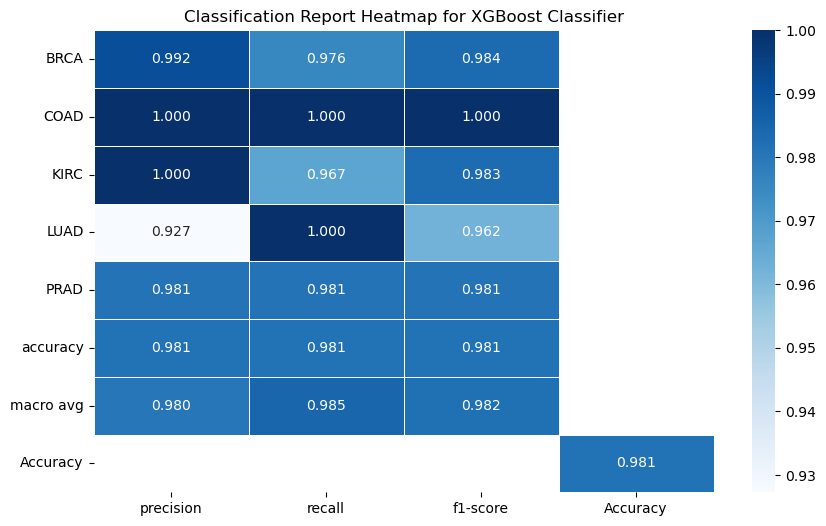

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import pandas as pd

# Assuming y_test and y_pred are defined and contain the true and predicted labels
report = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Prepare the DataFrame for heatmap
# Exclude the 'support' column and the last row (which contains average/total metrics)
heatmap_data = report_df.drop(columns="support").iloc[:-1, :]

# Extract accuracy and convert it into a DataFrame
accuracy_data = pd.DataFrame({'Accuracy': report['accuracy']}, index=["Accuracy"])

# Combine heatmap data and accuracy data
combined_data = pd.concat([heatmap_data, accuracy_data])

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(combined_data, annot=True, cmap="Blues", fmt=".3f", linewidths=.5)
plt.title("Classification Report Heatmap for XGBoost Classifier")
plt.yticks(rotation=0)  # Keep the class names horizontal
plt.show()


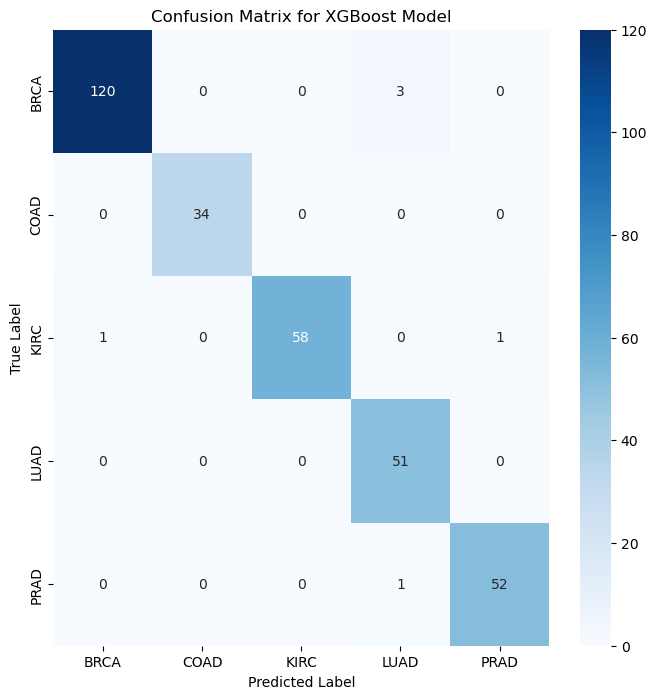

In [138]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for XGBoost Model')
plt.show()


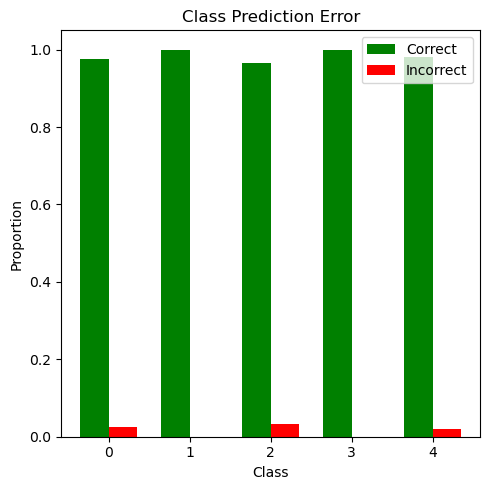

In [139]:
# Plotting Class Prediction Error based on the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming y_test aretrue labels and y_pred are the predictions from XGBoost
y_pred = xgb_clf.predict(X_test_pca)  

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
classes = np.unique(y_test)

# Calculate the percentage of total for each class
class_totals = conf_matrix.sum(axis=1)
class_correct = np.diag(conf_matrix)
class_error = class_totals - class_correct

# Plot
fig, ax = plt.subplots(figsize=(5, 5))
indices = np.arange(len(classes))
bar_width = 0.35

ax.bar(indices, class_correct / class_totals, bar_width, label='Correct', color='Green')
ax.bar(indices + bar_width, class_error / class_totals, bar_width, label='Incorrect', color='red')

# Labeling
ax.set_xlabel('Class')
ax.set_ylabel('Proportion')
ax.set_title('Class Prediction Error')
ax.set_xticks(indices + bar_width / 2)
ax.set_xticklabels(classes)
ax.legend()

plt.tight_layout()
plt.show()

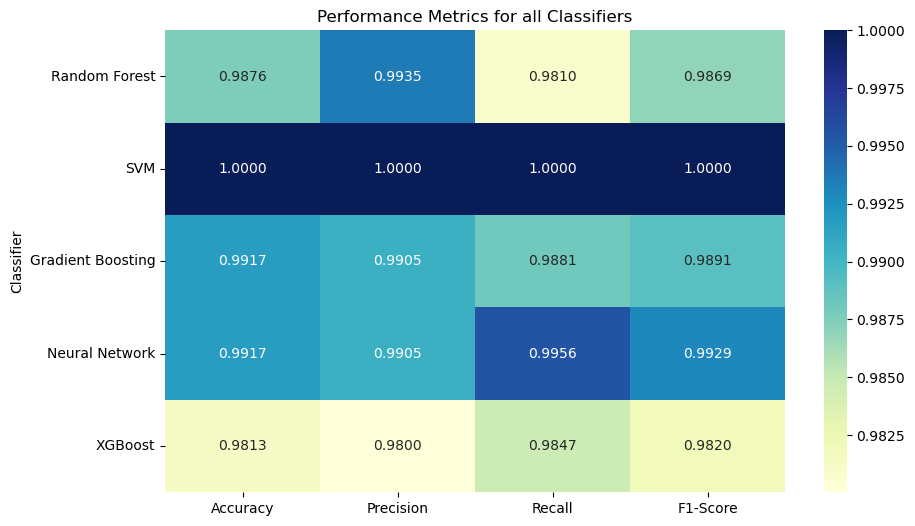

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data for the classifiers and their performance metrics
data = {
     "Classifier": ["Random Forest", "SVM", "Gradient Boosting", "Neural Network", "XGBoost"],
    "Accuracy": [rf_accuracy, svm_accuracy, gb_accuracy, nn_accuracy, xgb_accuracy],
    "Precision": [rf_precision, svm_precision, gb_precision, nn_precision, xgb_precision],
    "Recall": [rf_recall, svm_recall, gb_recall, nn_recall, xgb_recall],
    "F1-Score": [rf_fscore, svm_fscore, gb_fscore, nn_fscore, xgb_fscore]
}

# Creating a DataFrame from the data
df = pd.DataFrame(data)
df.set_index('Classifier', inplace=True)

# Creating the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, cmap="YlGnBu", fmt=".4f")
plt.title("Performance Metrics for all Classifiers")

# Show the plot
plt.show()
